# Analysis of Loan Data from Prosper
## by Neha Ranganath

## Preliminary Wrangling

The data being analyzed as part of this project is a loan dataset from Prosper. The dataset loan data with 81 variables for each loan, including loan amount, interest rate, loan status, borrower income, employment status, credit history, and the latest payment information.

The main goal of this project is to summarize the characteristics of variables that affect loan status and to gain an understanding of the relationships among multiple variables, using summary statistics, exploratory data visualization, and explanatory data visualization.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
#loading loan dataset
loan=pd.read_csv('prosperLoanData.csv')
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
loan.shape

(113937, 81)

In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### What is the structure of your dataset?

The dataset contains data about over 100,000 loans, having 113,937 rows and 81 columns. It contains details about loan status, borrower employment status, borrower income, loan amount, APR, and many other parameters.  <br>

### What is/are the main feature(s) of interest in your dataset?

The main areas of interest are the factors that most impact borrower APR, Borrower Rate, the impact of income levels, credit grades,  on loan amount borrowed as well as APR. The number of loans listed by year will also provide insight into the provided dataset. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Income levels, loan terms, and credit grade could be potential features of interest, since they are most likely the deciding factors in borrower beahvior.

## Univariate Exploration

Univariate exploration of this loan data includes the following analysis:
1. Number of listings by Loan Status
2. Number of listings by Borrower State
3. Analysis of Stated Monthly Income
4. Breakdown of listings by Credit Grade

### 1. Number of listings by Loan Status

In [7]:
loan_status=loan.LoanStatus.value_counts()
loan_status

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

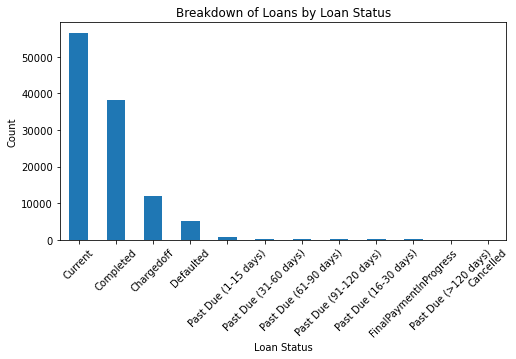

In [8]:
plt.figure(figsize=(8, 4))
loan_status.plot(kind='bar')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Breakdown of Loans by Loan Status')
plt.xticks(rotation=45);

Most of the listings in this dataset are for current loans. Over 50,000 loans listed here are still current and active. Approximately 40,000 listings show loans that are in a completed state.

### 2. Number of Listings by Borrower State

In [9]:
state_count = loan.BorrowerState.value_counts()
state_count

CA    14717
TX     6842
NY     6729
FL     6720
IL     5921
GA     5008
OH     4197
MI     3593
VA     3278
NJ     3097
NC     3084
WA     3048
PA     2972
MD     2821
MO     2615
MN     2318
MA     2242
CO     2210
IN     2078
AZ     1901
WI     1842
OR     1817
TN     1737
AL     1679
CT     1627
SC     1122
NV     1090
KS     1062
KY      983
OK      971
LA      954
UT      877
AR      855
MS      787
NE      674
ID      599
NH      551
NM      472
RI      435
HI      409
WV      391
DC      382
MT      330
DE      300
VT      207
AK      200
SD      189
IA      186
WY      150
ME      101
ND       52
Name: BorrowerState, dtype: int64

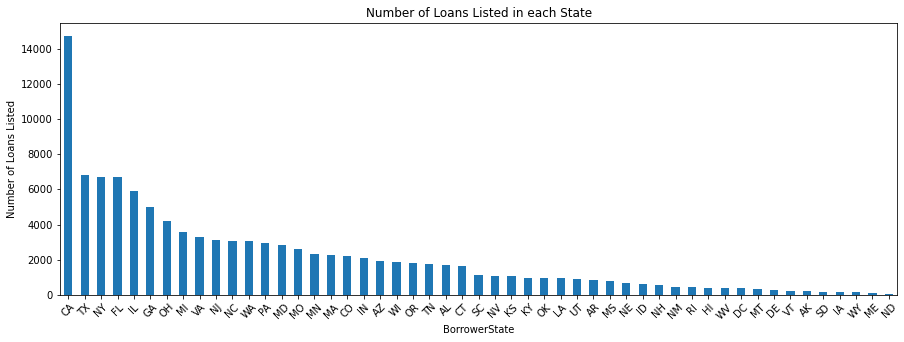

In [10]:
# plot the bar graph
plt.figure(figsize=(15, 5))
state_count.plot(kind='bar')

plt.title('Number of Loans Listed in each State')
plt.xlabel('BorrowerState')
plt.ylabel('Number of Loans Listed')
plt.xticks(rotation=45);

From this bar graph, we can see that the most number of loans were taken by residents of California, Texas, and New York.

### 3. Analysis of Stated Monthly Income

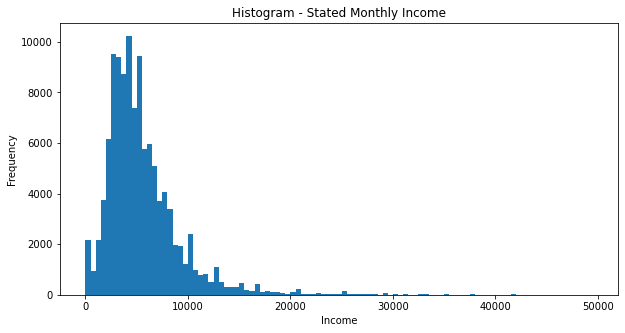

In [11]:
plt.figure(figsize=(10, 5))
bins_smi = np.arange(0, 50000, 500)
plt.hist(data = loan, x = 'StatedMonthlyIncome', bins=bins_smi)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Histogram - Stated Monthly Income');

From the above histogram, the monthly income of most borrowers peaks at around $5000, with a frequency of almost 10,000.

### 4. Number of Loans by Credit Grade

In [12]:
credit_grade=loan.CreditGrade.value_counts()
credit_grade

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

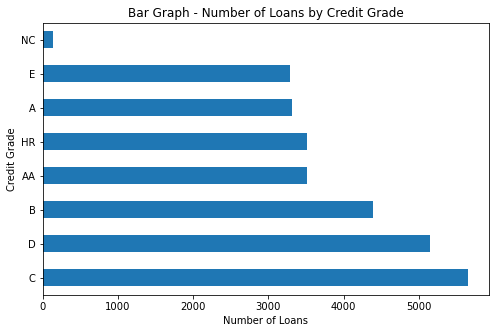

In [13]:
plt.figure(figsize=(8, 5))
credit_grade.plot(kind='barh')
plt.xlabel('Number of Loans')
plt.ylabel('Credit Grade')
plt.title('Bar Graph - Number of Loans by Credit Grade');

The maximum number of listings in this dataset have a credit grade C, followed by a credit grade D. This analysis only applies to loans taken out before 2009, since the credit grade value has been populated only during the pre-2009 period.

## Bivariate Exploration

In this section, the following bivariate analysis was carried out:
1. Changes in BorrowerRate by year
2. Relationship between available bank card credit and borrower rate
3. Employment Status vs Loan Term


In [14]:
loan['year'] = loan.ListingCreationDate.str.split('-').str[0]
loan['year']= pd.to_datetime(loan['year'], format='%Y')
loan['year'] = pd.DatetimeIndex(loan['year']).year

In [15]:
year_data = loan.year.value_counts(ascending=False)
print(year_data)

2013    35413
2012    19556
2007    11557
2011    11442
2008    11263
2014    10734
2006     6213
2010     5530
2009     2206
2005       23
Name: year, dtype: int64


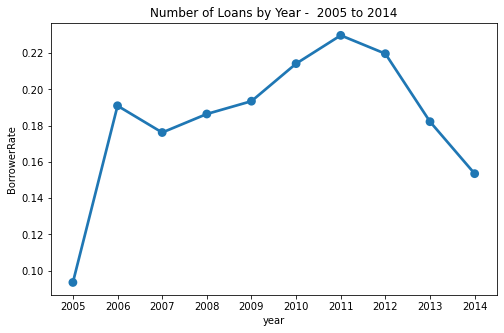

In [16]:
# plots the pointplot for year vs BorrowerRate
plt.figure(figsize=(8, 5))
sns.pointplot(data=loan, x='year', y='BorrowerRate',ci=None)
plt.title('Number of Loans by Year -  2005 to 2014');

The pointplot shows that the rate of interest increased from 2005-2006 and then fell from 2006-2007. It then steadily increased up for few years and reached its peak in 2011. It decreased constantly from 2011 onwards.

### 2. Relationship between available bank card credit and borrower rate

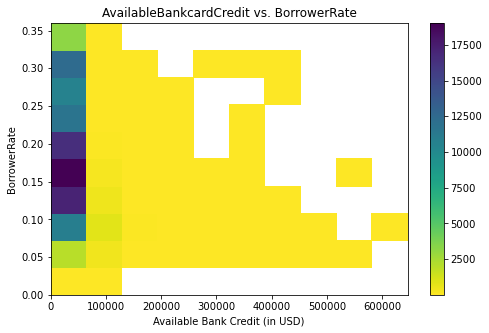

In [17]:
# remove the null entries
loan_sub = loan.loc[loan.AvailableBankcardCredit.notnull()]

plt.figure(figsize=(8, 5))
# plots the hist2d graph 
plt.hist2d(data=loan_sub, x='AvailableBankcardCredit', y='BorrowerRate', cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()

plt.xlabel('Available Bank Credit (in USD)')
plt.ylabel('BorrowerRate')
plt.title('AvailableBankcardCredit vs. BorrowerRate');

This 2D histogram plot indicates that the larger the amount in a borrower's bank card, the less loans they take and the borrower rate is also less in most cases.

### 3. Employment Status vs Loan Term

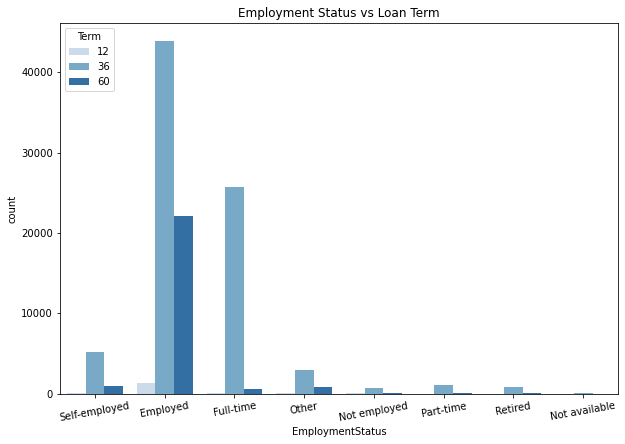

In [18]:
plt.figure(figsize = [10, 15])
# subplot 2: employment status vs. term
ax = plt.subplot(2, 1, 2)
sns.countplot(data = loan_sub, x = 'EmploymentStatus', hue = 'Term', palette = 'Blues')
plt.xticks(rotation=10)
plt.title('Employment Status vs Loan Term');

The bargraph above shows that most listings in this dataset are borrowers who are employed. Most borrowers who are employed full-time have a loan term of 36 months. 

## Multivariate Exploration

In the multivariate analysis of the dataset, the following dimensions have been analyzed: 
1. Comparison of relationships between Loan Term, Borrower APR, and Loan Amount.
2. Comparison of relationships between Loan Term, Available Bank Card Credit, and Loan Amount.
3. Effect of homeowner status on Borrower Rate over the years.

### 1. Analysis of Loan Term, Borrower APR, and Loan Amount

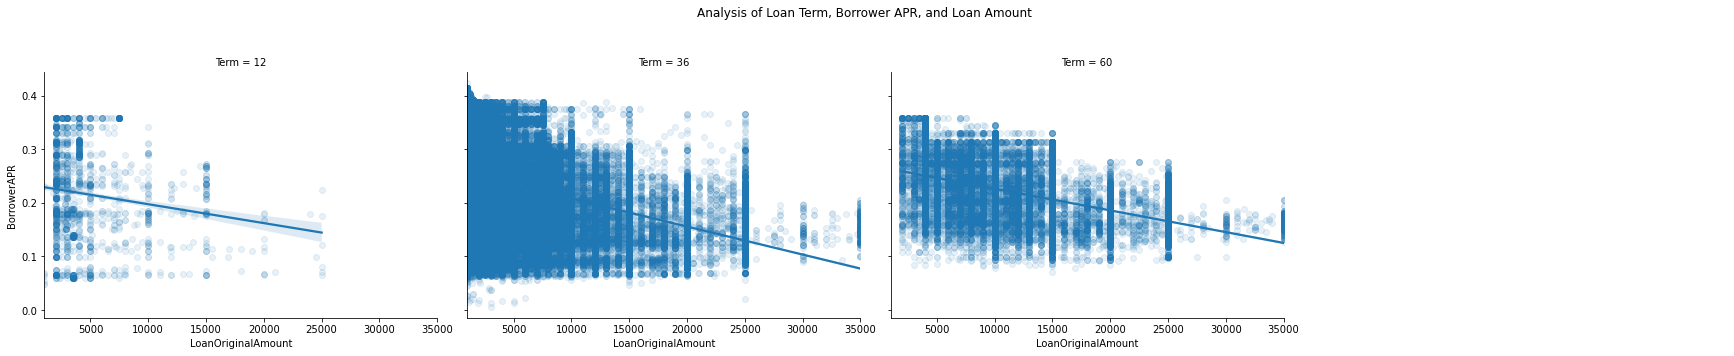

In [62]:
g=sns.FacetGrid(data=loan_sub, aspect=1.2, height=5, col='Term', col_wrap=4)
g.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1})
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Analysis of Loan Term, Borrower APR, and Loan Amount', horizontalalignment='center', verticalalignment='top')
g.add_legend();

Loan term doesn't seem to have significant impact on the relationship between APR and loan amount. 

### 2. Analysis of Loan Term, Available Bank Card Credit, and Loan Amount

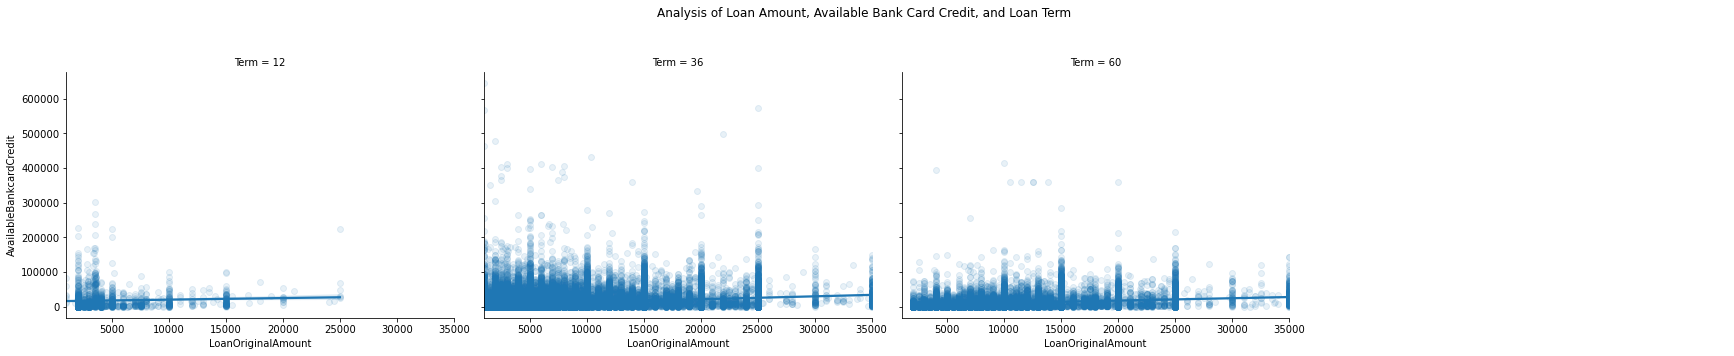

In [61]:
g=sns.FacetGrid(data=loan_sub, aspect=1.2, height=5, col='Term', col_wrap=4)
g.map(sns.regplot, 'LoanOriginalAmount', 'AvailableBankcardCredit', x_jitter=0.04, scatter_kws={'alpha':0.1})
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Analysis of Loan Amount, Available Bank Card Credit, and Loan Term', horizontalalignment='center', verticalalignment='top')
#g.fig.set_figwidth(8.27)
#g.fig.set_figheight(7.0)
g.add_legend();

The loan amount and available bank card credit appear to have a slight postive correlation. It can be seen that the majority of the loans in this dataset have a term of 36 months.

### 3. Effect of homeowner status on Borrower Rate over the years

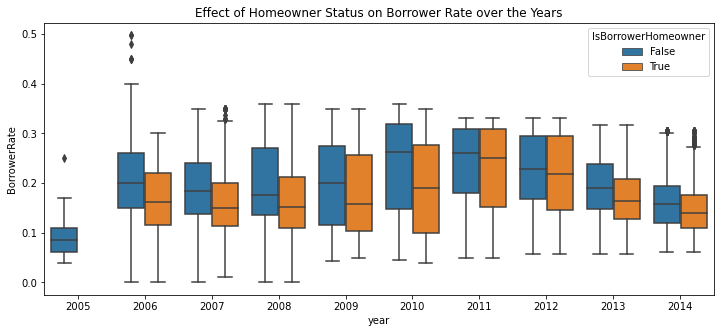

In [25]:
# plots the boxplot to analyze homeowner's and non-homeowner's rate over years
g = sns.boxplot(data=loan, x='year', y='BorrowerRate', hue='IsBorrowerHomeowner')
g.figure.set_figwidth(12)
g.figure.set_figheight(5)
g.set_title('Effect of Homeowner Status on Borrower Rate over the Years');

This boxplot shows that the borrower rate increased for some years for non homeowners, however it constantly decreased around 2010. As regards of homeowners, there wasn't much difference till 2009 but after 2009, the graph went up till 2011 and started falling off from then.